In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
import glob
nombre_archivos=glob.glob("/home/salvador/git/Analisis-Opinion-Publica/data/*.csv")

In [64]:
data=pd.concat(list(map(lambda x: pd.read_csv(x),nombre_archivos)))
data=data.reset_index()

Ahora vamos a empezar a modelar los datos

In [66]:
data.head()

,index,id,sentiment,review,review_español
0,0,281_1,0,"Awful, simply awful. It proves my theory about...","Horrible, simplemente horrible. Proviene mi te..."
1,1,8353_3,0,"Beaudray Demerille(a weak Peter Fonda, who als...","Beaudray Demerille (un débil Peter Fonda, quie..."
2,2,65_10,1,"This film isn't just about a school shooting, ...",Esta película no se trata solo de un tiro esco...
3,3,6255_8,1,This film show peoples in the middle of the ho...,Esta película muestra a los pueblos en medio d...
4,4,9145_1,0,Let me first state that I enjoy watching \bad\...,Permítanme decir primero que disfruto viendo \...


In [75]:
split = 0.85
d_train = data[:int(split*len(data))]
d_test = data[int((1-split)*len(data)):]

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [96]:
features = vectorizer.fit_transform(d_train["review_español"])
test_features = vectorizer.transform(d_test["review_español"])
i = 45000
j = 10
words = vectorizer.get_feature_names()[i:i+10]
#pd.DataFrame(features[j:j+7,i:i+10].todense(), columns=words)

In [100]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(features, d_train["sentiment"])
pred1 = model1.predict_proba(test_features)

In [116]:
def performance(y_true, pred, color="g", ann=True):
    acc = accuracy_score(y_true, pred[:,1] > 0.5)
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plt.plot(fpr, tpr, color, linewidth="3")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    if ann:
        plt.annotate("Acc: %0.2f" % acc, (0.2,0.7), size=14)
        plt.annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

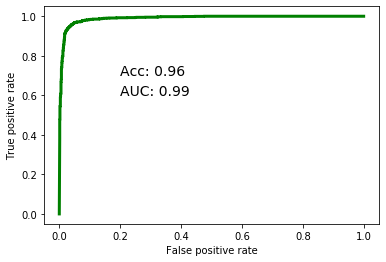

In [117]:
performance(d_test["sentiment"], pred1)

In [125]:
model1.predict(vectorizer.transform(["feliz cumpleaños alfredo que sigas teniendo muchas bendiciones y exitos en tu vida, nada es imposible"]))

array([1])

In [140]:
model1.predict(vectorizer.transform(["estúpido"]))

array([0])

In [134]:
for i in d_test[d_test["sentiment"]==0]["review_español"]:
    print(i)
    print("*"*100)

Normalmente, tengo cosas mucho mejores que hacer con mi tiempo que escribir comentarios, pero estaba tan decepcionado con esta película que pasé una hora registrándome con IMDB solo para sacarme de mi pecho. <br /> <br /> Una película con nombres como Morgan Freeman o Kevin Spacey sería una apuesta bancaria ... Bueno, esta película fue solo terrible. Es casi imposible, suspender la incredulidad "; lo intenté, realmente, quería disfrutarlo, pero Justin Timberlake no me dejaría. <br /> <br /> Timberlake debería atenerse a la música, qué terrible rendimiento - Ninguna presencia como actor, sin carácter. No puedo culpar a todo en Justin: la película también cuenta con una terrible parcela y una edición muy cronometrada; es definitivamente un \ "F \". <br /> <br /> Después de ver esto , Tengo que preguntarme lo que realmente motiva a los actores. Quiero decir, seguramente Morgan realmente leyó el guión antes de tomar la parte. ¿No vio lo pobre que era? ¿Qué luego podría motivarlo a tomar el

Creo que he visto películas peores, así que estoy dando esto a 3, ¡pero es una lucha por recordar lo que podrían haber sido! Posiblemente Xtro (desagradable y aburrido) o posiblemente, (simplemente sin brillo), pero es una lucha para pensar en algo peor. Es difícil saber a dónde empezar. Digamos que es un hombre pobre debajo de Siege, protagonizando a un hombre aún más pobre, Jean Claude Van Damme. La única característica redentora fue ver a Casper Van Dien, siempre me pregunté qué le sucedió después de StarShip Troopers. Sí, él era Johnny Rico, si realmente quieres saber. <br /> <br /> A juzgar por este sitio, ha estado atrapado en la película del infierno de la televisión ... Casper, sé más selectivo ... ¡¡¡Por favor !! !!!!!!!!!!! Arghhhhh, acabo de entregarme y hay una película media decente llamada la ley criminal ... ¡Ahora estoy empezando a resentirme realmente con las últimas 1.5 horas!
********************************************************************************************